In [1]:
import numpy as np
from equations_BM import *
from binary_data import *
import pickle
import pylab
import math
np.random.seed(4)

In [2]:
def poisson(lam, k):
    return np.divide(float(np.power(lam, k)), math.factorial(k)) * np.exp(-1. * lam)

def fr(r, dt):
    return r * dt

In [203]:
## predictions (#spikes, prob)
ycount = np.ones(1024)
states = list(product([-1, 1], repeat=10))
for state in range(len(states)):
#     ycount[state] *= poisson(sum(np.array(states[state]) == 1) * 2, 0)
    for i in range(len(states[0])):
        if states[state][i] == 1:
            ycount[state] *= float(1./10)


print ycount[:20]
print ycount[20:]



[  1.00000000e+00   1.00000000e-01   1.00000000e-01   1.00000000e-02
   1.00000000e-01   1.00000000e-02   1.00000000e-02   1.00000000e-03
   1.00000000e-01   1.00000000e-02   1.00000000e-02   1.00000000e-03
   1.00000000e-02   1.00000000e-03   1.00000000e-03   1.00000000e-04
   1.00000000e-01   1.00000000e-02   1.00000000e-02   1.00000000e-03]
[  1.00000000e-02   1.00000000e-03   1.00000000e-03 ...,   1.00000000e-09
   1.00000000e-09   1.00000000e-10]


2.06115362244e-09


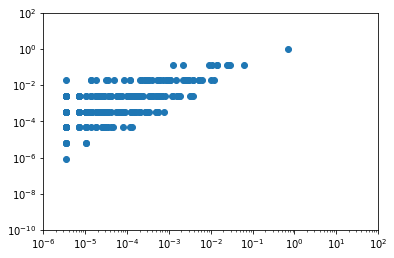

In [202]:
plt.figure()
print ycount[len(ycount)-1]
# plt.plot(range(0, len(ycount)), ycount)
# for i in range(len(np.array(xcount))):
#     plt.scatter(xcount[i] / 283041., ycount[i], c="grey", s=8)
plt.plot(xcount / 283041., ycount, marker='o', linewidth=0)
plt.xscale('log')
plt.yscale('log')
plt.ylim(1.e-10, 1.e2)
plt.xlim(1.e-6, 1.e2)
plt.show()


In [5]:
# data (spike train > # neurons)
bint = np.loadtxt('bint.txt')
bint = bint[20:30, :]
bint[bint < 0.5] = -1

In [6]:
# observations (count occurrence)
# N = np.shape(bint)[1]
# xcount = np.zeros(11)
# for k in range(N):
#     for j in states:
#         if (np.array(bint[:, k]) == np.array(j)).all():
#             xcount[sum(np.array(j) == 1)] += 1
# print xcount

In [7]:
# observations (count occurrence)
N = np.shape(bint)[1]
xcount = np.zeros(1024)
for obs in range(N):
    for state in range(np.shape(states)[0]):
        if (np.array(bint[:, obs]) == np.array(states[state])).all():
            xcount[state] += 1

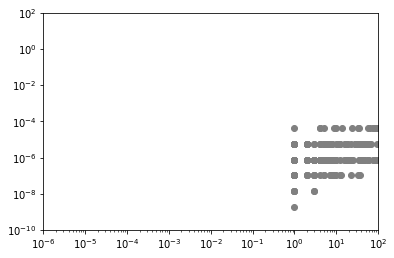

In [14]:
plt.figure()
for i in range(len(np.array(xcount))):
    plt.scatter(xcount[i], ycount[i], c="grey")
plt.xscale('log')
plt.yscale('log')
plt.ylim(1.e-10, 1.e2)
plt.xlim(1.e-6, 1.e2)
plt.show()

In [9]:
# Boltmann predictions
n = 200
w, b, weightlist, wsum, bsum = boltzmann_train(bint, eta=0.03, n_epochs=n)

-84.2398686336
28.2139169264


In [53]:
# predictions
# predictions (#spikes, prob)
zcount = np.zeros(1024)
states = list(product([-1, 1], repeat=10))
Z = np.sum(np.exp(states))
for state in range(len(states)):
    p = state_prob(states[state], w, b, Z)
    zcount[state] = p

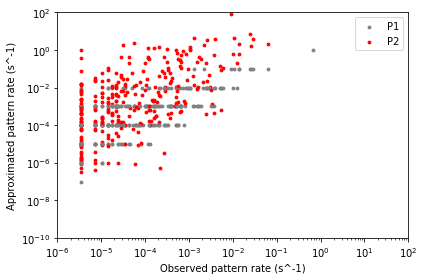

In [204]:
plt.figure()
leg = ["P1", "P2"]

for i in range(len(np.array(xcount))):
    plt.scatter(xcount[i] / 283041., ycount[i], c="grey", s=8)
    plt.scatter(xcount[i] / 283041., zcount[i], c="red", s=8)
plt.xscale('log')
plt.yscale('log')
plt.ylim(1.e-10, 1.e2)
plt.xlim(1.e-6, 1.e2)
plt.legend(leg)
plt.xlabel("Observed pattern rate (s^-1)")
plt.ylabel("Approximated pattern rate (s^-1)")
plt.tight_layout()
plt.show()

In [12]:
# for i in range(L): 
#     lst_new=np.array(lst2[i])
#     min_E=0.5*(np.dot(lst_new.T, np.dot(W, lst_new))) + np.dot(theta.T,lst_new)
#     E_list.append(min_E)
#     countX=0
#     for j in range(np.shape(s)[0]):
#         if np.sum(s[j]-lst_new)==0:
#             countX=countX+1
#     observed_pattern.append(countX)
#     iteration+=1
#     print(iteration)

In [13]:
# rate_obs=np.asarray(observed_pattern)/(np.shape(s)[0])
# Z=np.sum(np.exp(E_list))
# p_s=((1/Z)*np.exp(E_list))